In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
import ToolBox as tb

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
X = pd.read_csv('data\clean_data\clean_features.csv')
y = pd.read_csv('data/clean_data/clean_target_gradeClass.csv')['GradeClass']

In [93]:
info_col={'StudentID': 'A unique identifier assigned to each student (1001 to 3392).',
                    'Age': 'The age of the students ranges from 15 to 18 years.',
                    'Gender': ' Gender of the students, where 0 represents Male and 1 represents Female.',
                    'Ethnicity': ' The ethnicity of the students, coded as \n 0: Caucasian \n 1: African American \n 2: Asian \n 3: Other',
                    'ParentalEducation': "The education level of the parents, coded as \n 0: None \n 1: High School \n 2: Some College \n 3: Bachelor's \n 4: Higher",
                    'StudyTimeWeekly': 'Weekly study time in hours, ranging from 0 to 20.',
                    'Absences': 'Number of absences during the school year, ranging from 0 to 30.',
                    'Tutoring': 'Tutoring status, where 0 indicates No and 1 indicates Yes.',
                    'ParentalSupport': 'The level of parental support, coded as \n 0: None \n 1: Low \n 2: Moderate \n 3: High \n 4: Very High',
                    'Extracurricular': 'Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.',
                    'Sports': 'Participation in sports, where 0 indicates No and 1 indicates Yes.',
                    'Music': 'Participation in music activities, where 0 indicates No and 1 indicates Yes.',
                    'Volunteering': 'Participation in volunteering, where 0 indicates No and 1 indicates Yes.',
                    'GPA': 'Grade Point Average on a scale from 0.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.',
                    'GradeClass': "Classification of student's grades based on GPA: \n 0: 'A' (GPA >= 3.5) \n 1: 'B' (3.0 <= GPA < 3.5) \n 2: 'C' (2.5 <= GPA < 3.0)\n 3: 'D' (2.0 <= GPA < 2.5)\n 4: 'F' (GPA < 2.0)."
                   }

# Split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

In [95]:
variables_numericas=['StudyTimeWeekly','Absences']
variables_categoricas=[i for i in X.columns if i not in variables_numericas]

# Pruebas

In [124]:
from sklearn.preprocessing import PowerTransformer

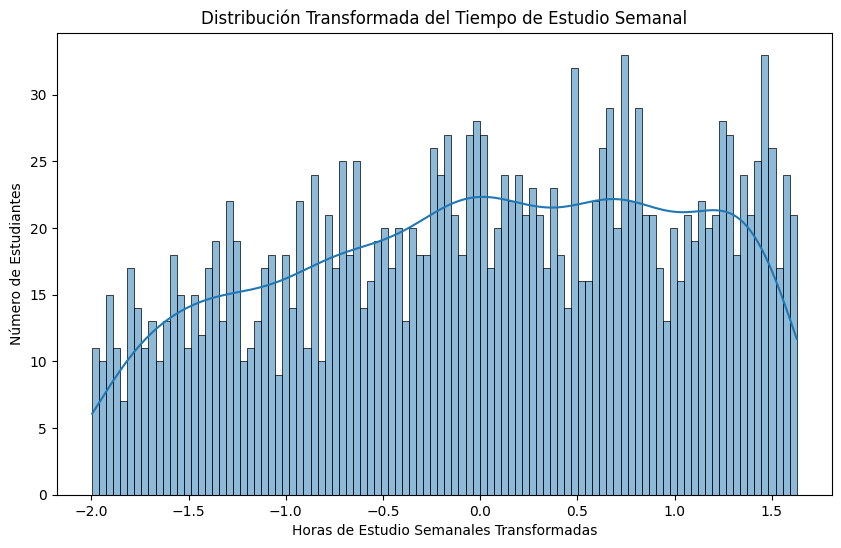

In [145]:
data=X_train.copy()
pt = PowerTransformer(method='yeo-johnson')

data['StudyTimeWeekly' + '_transformed'] =  pt.fit_transform(data[['StudyTimeWeekly']])

plt.figure(figsize=(10, 6))
sns.histplot(data['StudyTimeWeekly' + '_transformed'], kde=True,bins=100)
plt.title('Distribución Transformada del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales Transformadas')
plt.ylabel('Número de Estudiantes')
plt.show()

# fin pruebas

# Numerical Features

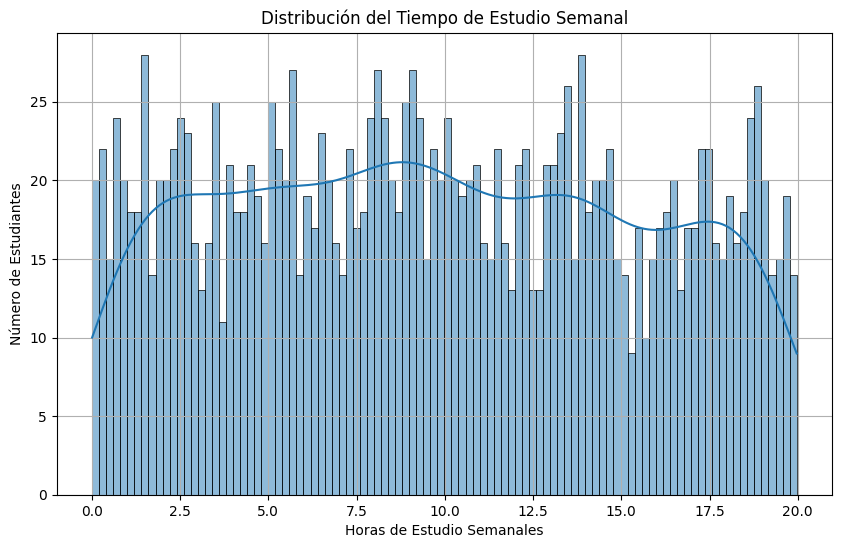

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

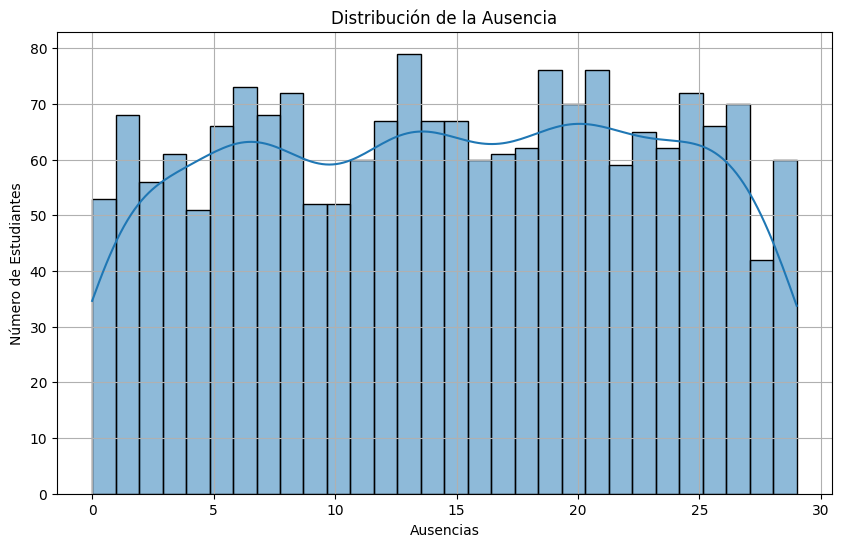

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [69]:
scaler = StandardScaler()
X_train[variables_numericas] = scaler.fit_transform(X_train[variables_numericas])

In [85]:
X_train[variables_numericas].describe()

,StudyTimeWeekly,Absences
count,1.913000e+03,1.913000e+03
mean,2.692857e-17,-1.764285e-17
std,1.000261e+00,1.000261e+00
min,-1.708474e+00,-1.723237e+00
25%,-8.401381e-01,-8.980672e-01
50%,-4.028255e-02,4.498347e-02
75%,8.171785e-01,8.701528e-01
max,1.792568e+00,1.695322e+00


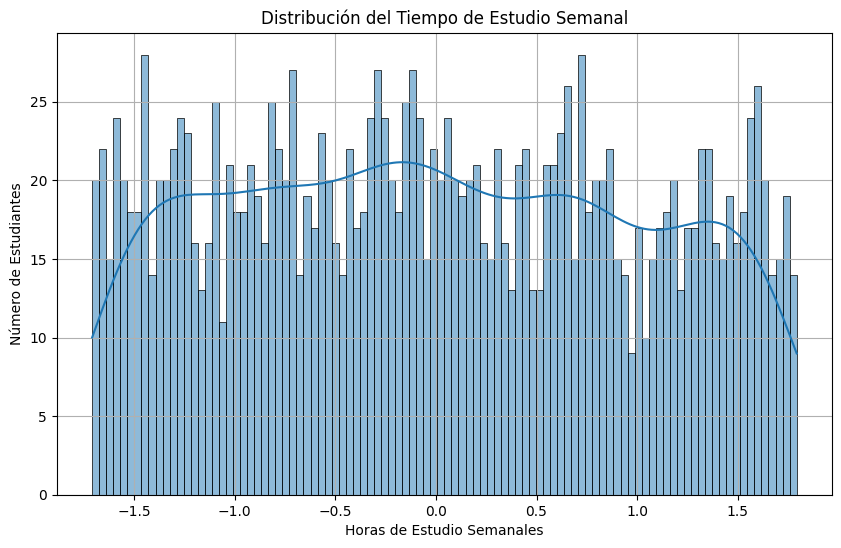

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

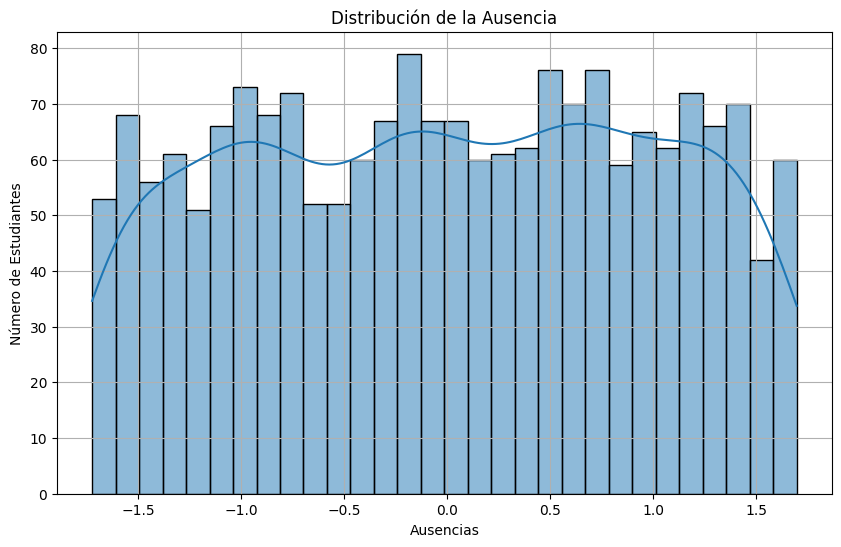

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

# FIN PRUEBAS

## Catergorical features

In [72]:
variables_categoricas

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

In [73]:
def plot_cat(ax, df, variable):
    counts = df[variable].value_counts().reset_index()
    counts.columns = [variable, 'Frequency']
    print(f"Value counts for {variable}:\n{counts}\n")
    
    sns.barplot(x=variable, y='Frequency', hue=variable, data=counts, dodge=False, palette='viridis', ax=ax)
    ax.set_title(f'Distribución de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    
    # Frecuencia encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Añadir leyenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title=variable, loc='upper right')

In [77]:
def plot_categorical_vs_target(ax, df, target:pd.Series, categorical_var):
    crosstab = pd.crosstab(df[categorical_var], target)
    crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100 # para verlo como porcentaje
    crosstab.plot(kind='bar', stacked=True, ax=ax, figsize=(10,6))
    ax.set_xlabel(f'{categorical_var}')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Distribution of {target.name} Based on {categorical_var}')
    ax.legend(title='Target')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=10, color='white')

In [78]:
from IPython.display import display, Markdown

def describir_cat(df: pd.DataFrame, variables_categoricas: list, target: pd.Series):
    for variable_categorica in variables_categoricas:
        display(Markdown(f"# Para la variable **{variable_categorica}**"))
        fig, axes = plt.subplots(1, 2, figsize=(25, 6))
        
        # Llamar a plot_cat y plot_categorical_vs_target pasando los ejes correspondientes
        plot_cat(axes[0], df, variable_categorica)
        plot_categorical_vs_target(axes[1], df, target, variable_categorica)
        
        plt.tight_layout()
        plt.show()

# Para la variable **Age**

Value counts for Age:
   Age  Frequency
0   15        511
1   16        479
2   17        462
3   18        461



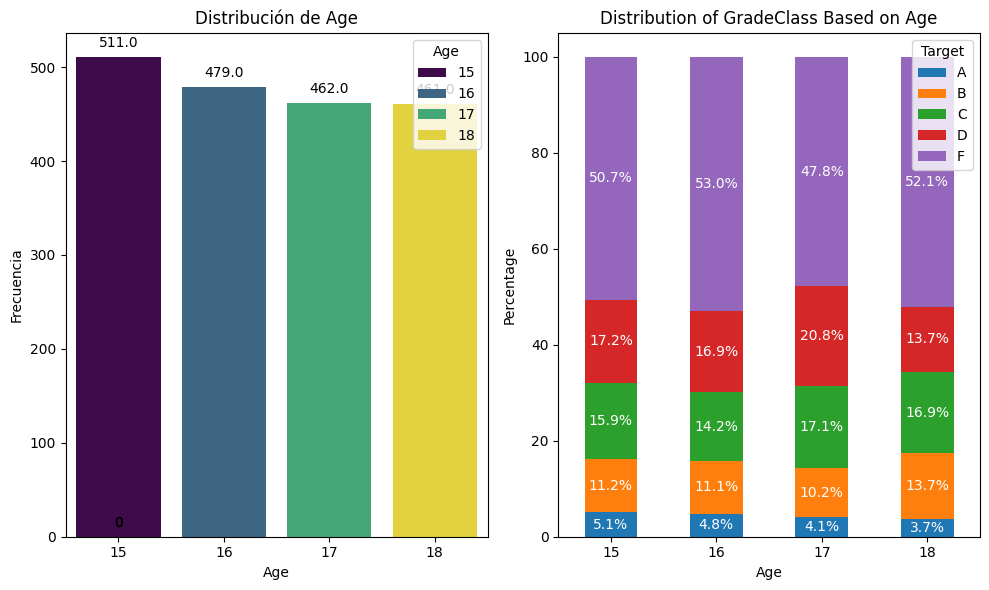

# Para la variable **Gender**

Value counts for Gender:
   Gender  Frequency
0  Female        984
1    Male        929



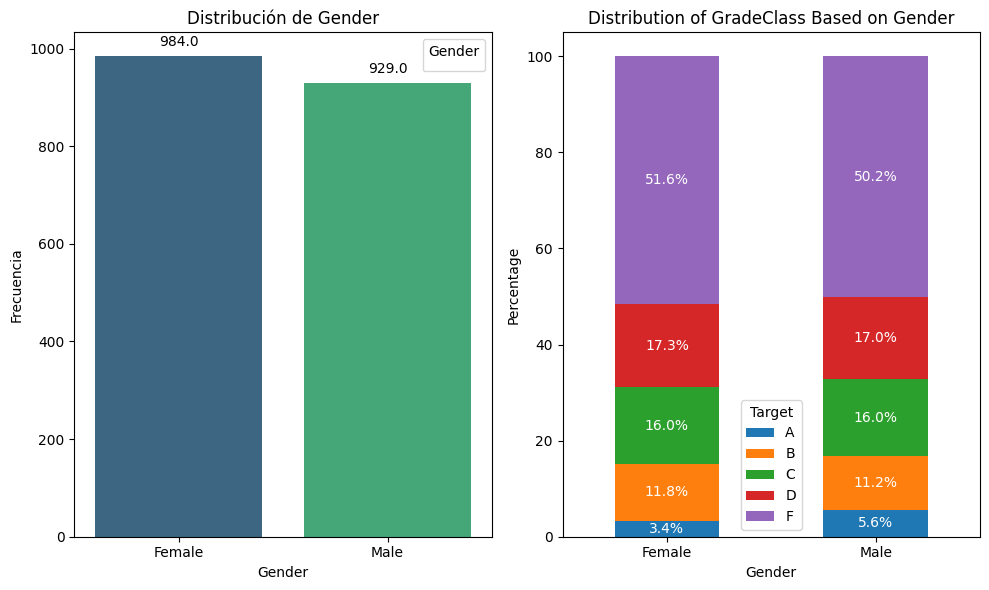

# Para la variable **Ethnicity**

Value counts for Ethnicity:
          Ethnicity  Frequency
0         Caucasian        975
1  African American        386
2             Asian        372
3             Other        180



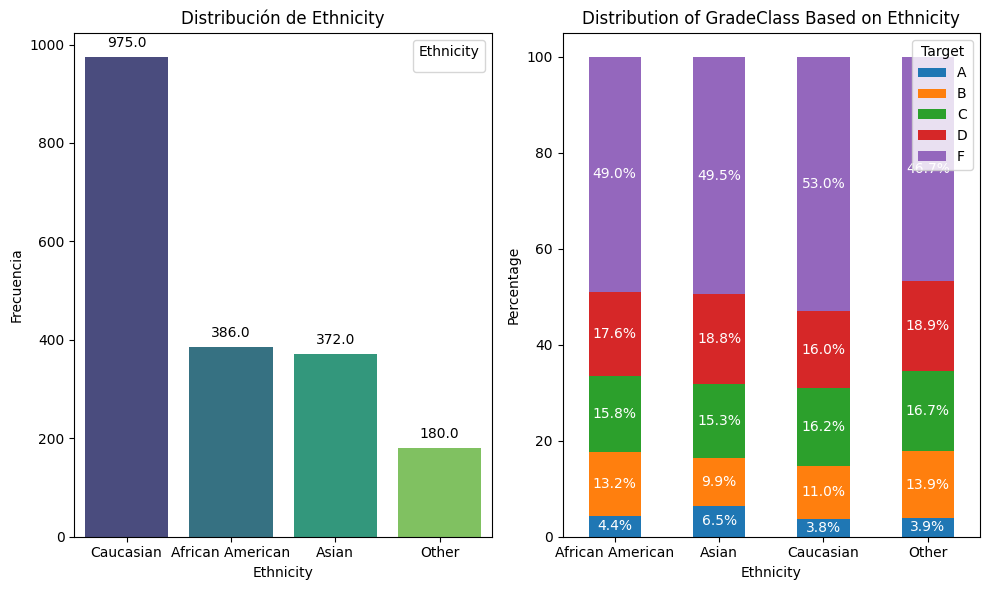

# Para la variable **ParentalEducation**

Value counts for ParentalEducation:
  ParentalEducation  Frequency
0      Some College        757
1       High School        576
2        Bachelor's        307
3            Higher         91



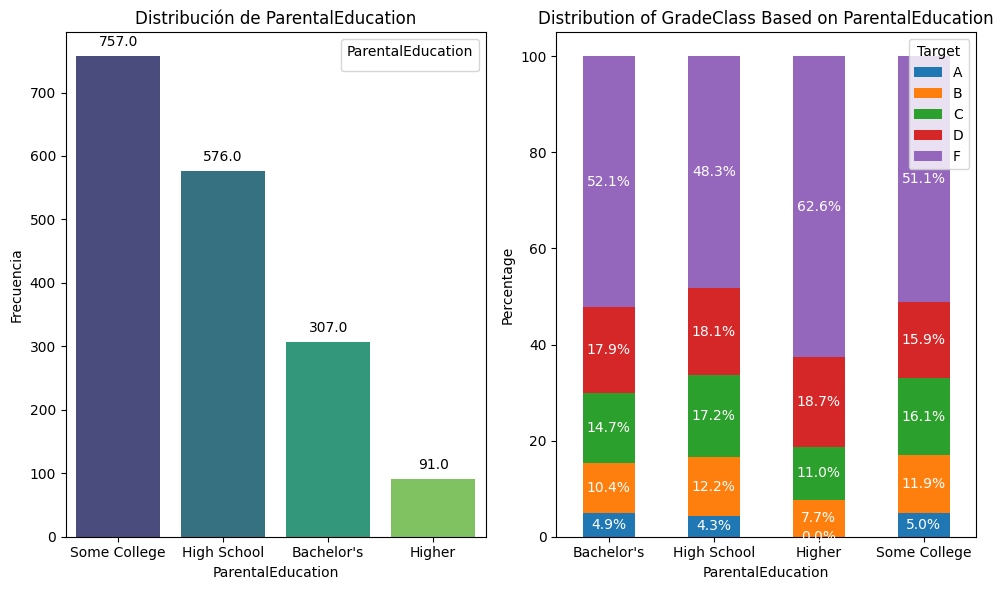

# Para la variable **Tutoring**

Value counts for Tutoring:
   Tutoring  Frequency
0         0       1335
1         1        578



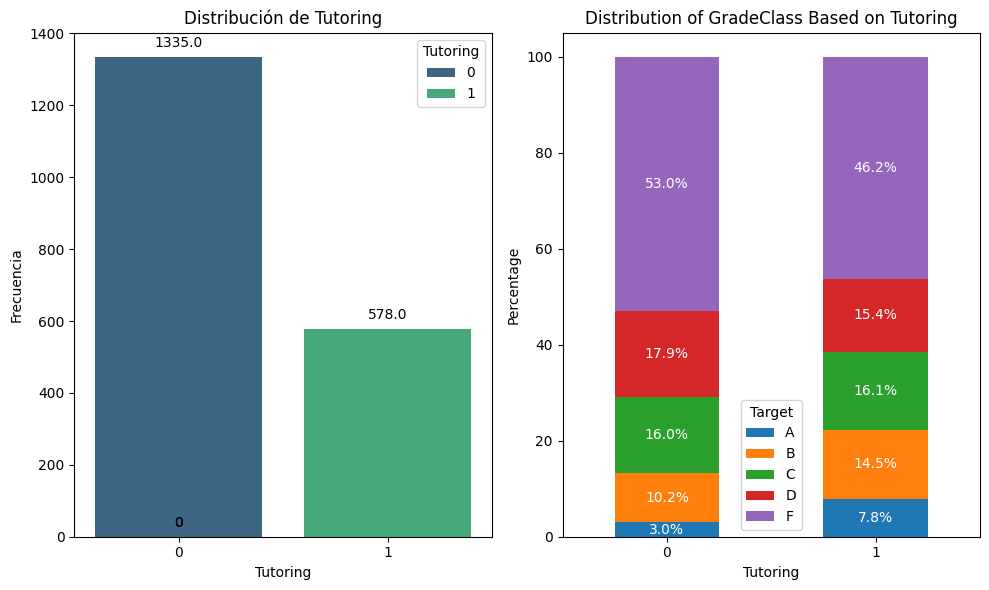

# Para la variable **ParentalSupport**

Value counts for ParentalSupport:
  ParentalSupport  Frequency
0        Moderate        597
1            High        560
2             Low        385
3       Very High        209



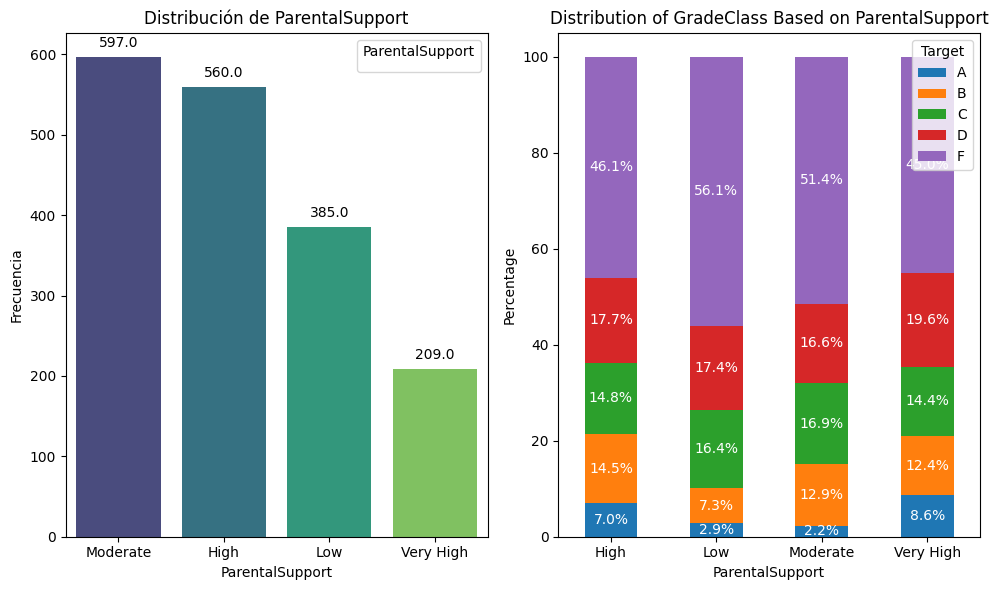

# Para la variable **Extracurricular**

Value counts for Extracurricular:
   Extracurricular  Frequency
0                0       1186
1                1        727



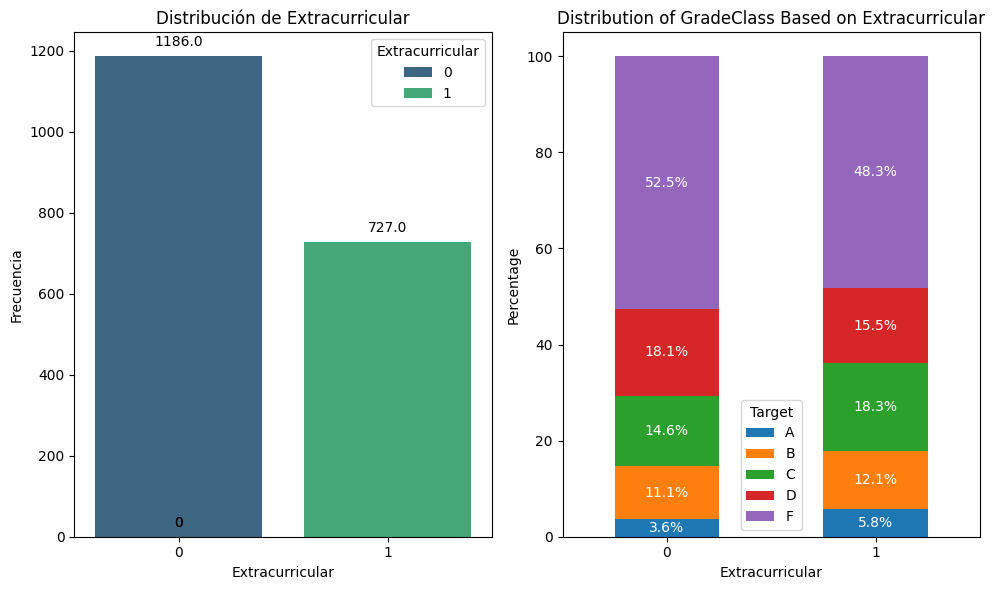

# Para la variable **Sports**

Value counts for Sports:
   Sports  Frequency
0       0       1330
1       1        583



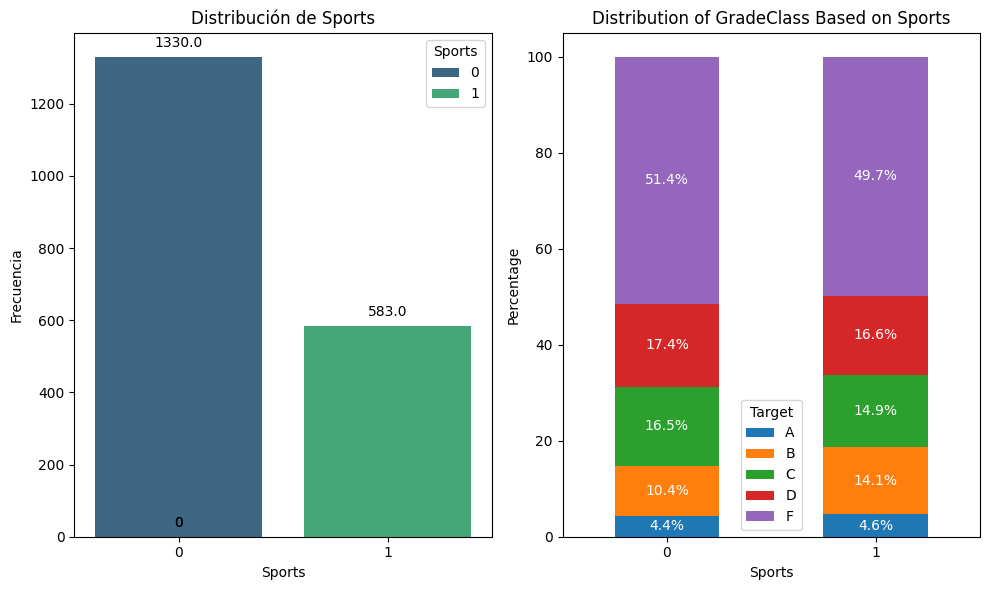

# Para la variable **Music**

Value counts for Music:
   Music  Frequency
0      0       1534
1      1        379



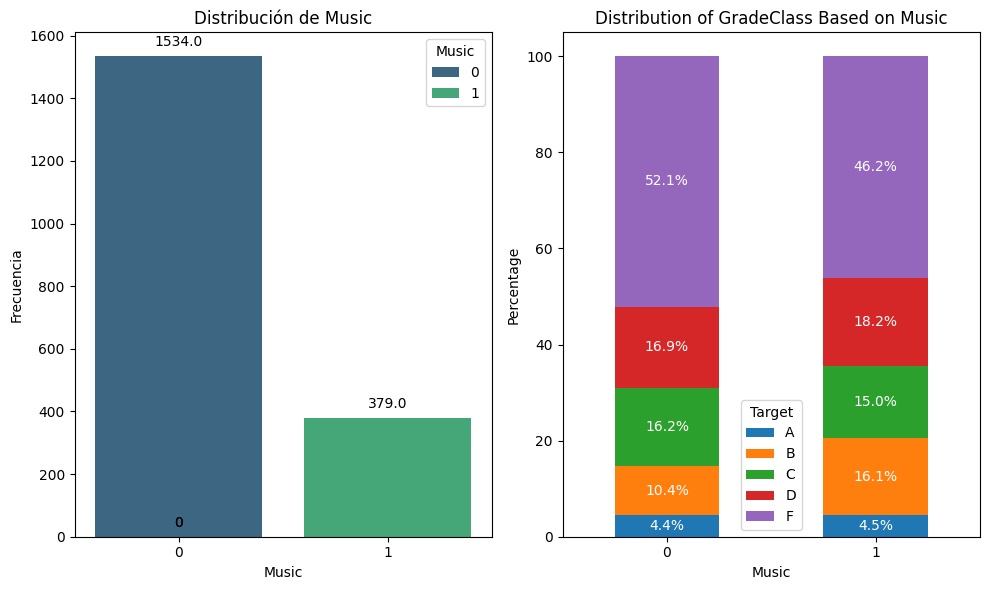

# Para la variable **Volunteering**

Value counts for Volunteering:
   Volunteering  Frequency
0             0       1614
1             1        299



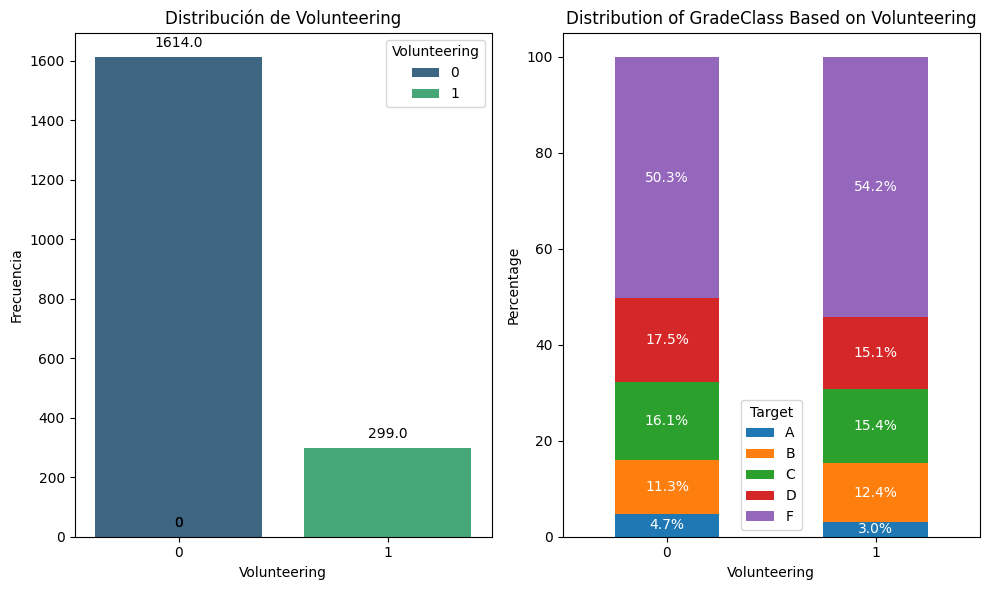

In [79]:
describir_cat(X_train,variables_categoricas,y_train)